## Observations and Insights 

Three observations:
1. Capomulin and Ramicane appear to be similarly effective in reducing tumor size.
2. Both Capomulin and Ramicane are less effective the heavier the mouse.
3. Moving forward, a head to head comparison between Capomulin and Ramicane with a comparable placebo time schedule would be recommended. Weight of the mice should be closely monitored.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.DataFrame.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [29]:
# Checking the number of mice.
mice_num = df["Mouse ID"].nunique()
mice_num


249

In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_dup = df[df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]
mouse_dup_id = df_dup.iloc[0,0]
mouse_dup_id

'g989'

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_dedup = df[df["Mouse ID"] != mouse_dup_id]
df_dedup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [33]:
# Checking the number of mice in the clean DataFrame.
mice_num = df_dedup["Mouse ID"].nunique()
mice_num

248

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_grouped = df_dedup.groupby("Drug Regimen")

tumor_count = df_grouped['Mouse ID'].nunique()
tumor_mean = round(df_grouped['Tumor Volume (mm3)'].mean(), 2)
tumor_median = round(df_grouped['Tumor Volume (mm3)'].median(), 2)
tumor_stdev = round(df_grouped['Tumor Volume (mm3)'].std(), 2)
tumor_sem = round(df_grouped['Tumor Volume (mm3)'].sem(), 2)

summary_df = pd.DataFrame({
    "Count" : tumor_count,
    "Mean" : tumor_mean,
    "Median" : tumor_median,
    "StDev" : tumor_stdev,
    "SEM" : tumor_sem
})

summary_df


,Count,Mean,Median,StDev,SEM
Drug Regimen,,,,,
Capomulin,25,40.68,41.56,4.99,0.33
Ceftamin,25,52.59,51.78,6.27,0.47
Infubinol,25,52.88,51.82,6.57,0.49
Ketapril,25,55.24,53.70,8.28,0.60
Naftisol,25,54.33,52.51,8.13,0.60
Placebo,25,54.03,52.29,7.82,0.58
Propriva,24,52.32,50.45,6.62,0.54
Ramicane,25,40.22,40.67,4.85,0.32
Stelasyn,24,54.23,52.43,7.71,0.57


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

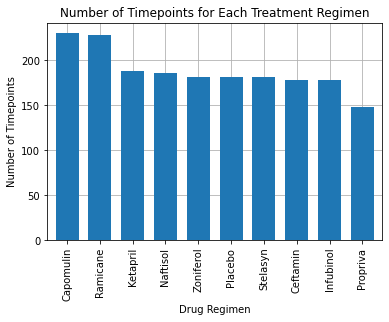

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = df_dedup['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Timepoints")
bar_plot.set_title("Number of Timepoints for Each Treatment Regimen")
bar_plot.grid(zorder=0)

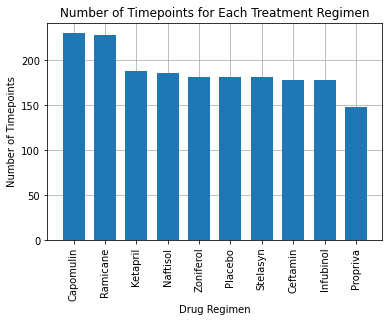

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = df_dedup['Drug Regimen'].value_counts()
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, width = 0.7, zorder = 3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values, rotation = 90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title('Number of Timepoints for Each Treatment Regimen')

plt.grid(zorder = 0)

Text(0, 0.5, '')

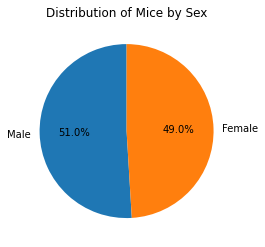

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = df_dedup['Sex'].value_counts()
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution of Mice by Sex')
pie_plot.set_ylabel('')

Text(0.5, 1.0, 'Distribution of Mice by Sex')

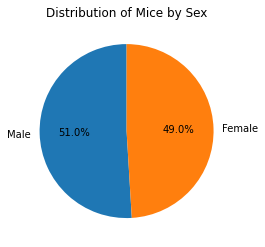

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution of Mice by Sex')


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(df_dedup.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Last Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(df_dedup, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = df["Drug Regimen"].unique()
# For only selected drugs, would use following code
# drugs = ['Capomulin', 'Ramicane', 'Infubinol', and 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

sum_cols = ["Drug", "IQR", "Upper Bound", "Lower Bound", "Number of Outliers"]
sum_list = []
sum_tab = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
    final_vol_df = drug_df.loc[drug_df['Timepoint'] == drug_df['Last Timepoint']]
    
    # add subset
    volumes = final_vol_df['Tumor Volume (mm3)']
    tumor_vols.append(volumes)
    
    # Determine IQR
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)

    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)

    outliers_count = (volumes.loc[(final_vol_df['Tumor Volume (mm3)'] >= upper_bound) | (final_vol_df['Tumor Volume (mm3)'] <= lower_bound)]).count()

    values = [drug, iqr, upper_bound, lower_bound, outliers_count]
    zipped = zip(sum_cols, values)
    sum_list.append(dict(zipped))

sum_tab = pd.DataFrame(sum_list, columns = sum_cols) 
sum_tab
    

,Drug,IQR,Upper Bound,Lower Bound,Number of Outliers
0,Ramicane,9.10,54.31,17.91,0
1,Capomulin,7.78,51.83,20.71,0
2,Infubinol,11.48,82.75,36.83,1
3,Placebo,15.19,90.92,30.16,0
4,Ceftamin,15.58,87.67,25.35,0
5,Stelasyn,16.63,94.05,27.53,0
6,Zoniferol,16.81,92.01,24.77,0
7,Ketapril,13.15,89.60,37.00,0
8,Propriva,13.57,83.04,28.76,0
9,Naftisol,17.48,95.78,25.86,0


Text(0, 0.5, 'Final Tumor Volume (mm3)')

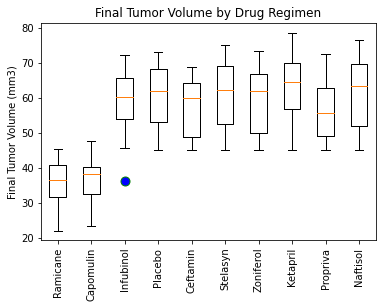

In [42]:
# Make outliers pop
flierprops = dict(marker='o', markerfacecolor='b', markersize=9, markeredgecolor='g')

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, flierprops = flierprops)

x_axis = np.arange(1, len(tumor_vols)+1)
plt.xticks(x_axis, labels = drugs, rotation = 90)

plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

v923


Text(0.5, 1.0, 'Capomulin Treatment of Mouse v923')

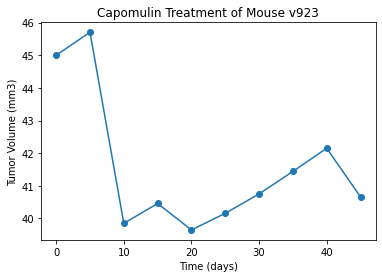

In [43]:
# Find a mouse
capo_df = df_dedup[df_dedup["Drug Regimen"] == "Capomulin"]
mouse = capo_df.iloc[random.randint(0, len(capo_df)),0]
print(mouse)

# Get that mouse's data
mouse_df = df_dedup.loc[df_dedup['Mouse ID'] == mouse]

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse {mouse}")

In [44]:
capo_df.head()
capo_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

Text(0.5, 1.0, 'Average Tumor Volume by Weight')

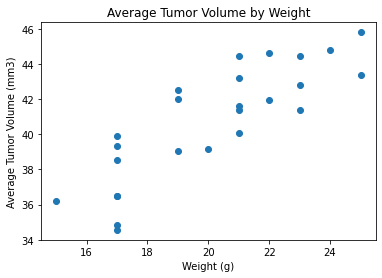

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol_df = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
weight_df = capo_df[['Mouse ID', 'Weight (g)']].drop_duplicates()

plot_df = pd.merge(avg_vol_df, weight_df, on = "Mouse ID", how = "left")

x = plot_df["Weight (g)"]
y = plot_df["avg_tumor_vol"]
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

## Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


Text(0.5, 1.0, 'Average Tumor Volume by Weight')

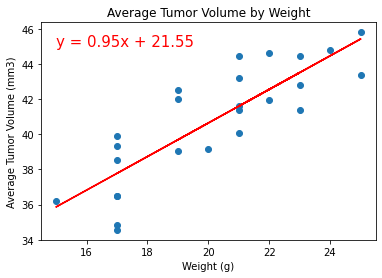

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = st.pearsonr(x,y)
corr_coef = round(corr[0],2)
print(f"The correlation between weight and average tumor volume on the Capomulin regimen is {corr_coef}.")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values, c = "red")

# Annotate linear regression
plt.annotate(line_eq,(15,45),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')


# Determine if Ramicane performs similarly to Capmulin

j913


Text(0.5, 1.0, 'Ramicane Treatment of Mouse j913')

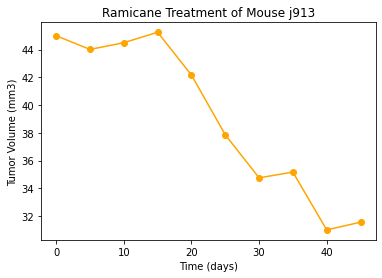

In [49]:
# Repeat analysis for Ramicane
# Find a mouse
rami_df = df_dedup[df_dedup["Drug Regimen"] == "Ramicane"]
mouse = rami_df.iloc[random.randint(0, len(capo_df)),0]
print(mouse)

# Get that mouse's data
mouse_df = df_dedup.loc[df_dedup['Mouse ID'] == mouse]

# Generate a line plot of tumor volume vs. time point for a mouse treated with Ramicane
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker = 'o', c = "orange")

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Ramicane Treatment of Mouse {mouse}")

The correlation between weight and average tumor volume on the Ramicane regimen is 0.81.


Text(0.5, 1.0, 'Average Tumor Volume by Weight')

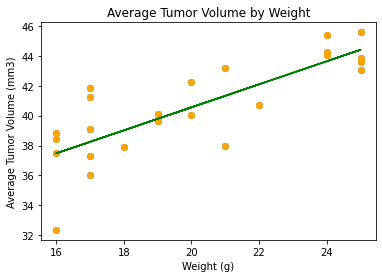

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol_df = pd.DataFrame(rami_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
weight_df = rami_df[['Mouse ID', 'Weight (g)']].drop_duplicates()

plot_df = pd.merge(avg_vol_df, weight_df, on = "Mouse ID", how = "left")

x = plot_df["Weight (g)"]
y = plot_df["avg_tumor_vol"]
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

corr = st.pearsonr(x,y)
corr_coef = round(corr[0],2)
print(f"The correlation between weight and average tumor volume on the Ramicane regimen is {corr_coef}.")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y, c = "orange")
plt.plot(x,regress_values, c = "green")

# Annotate linear regression
plt.annotate(line_eq,(15,45),fontsize=15,color="green")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')